# Interpolation

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.cg.voronoi import voronoi, voronoi_frames
import numpy as np
import numpy.ma as ma
from scipy.interpolate import griddata

In [2]:
# Load point data
houses = gpd.read_file('../../data/csds/snow1/deaths_nd_by_house.shp')

In [3]:
houses.head()

,ID,deaths_r,deaths_nr,deaths,pestfield,dis_pestf,dis_sewers,dis_bspump,geometry
0,92.0,0.0,0.0,0.0,0.0,283.23,51.72,442.99,POINT (-0.14237 51.51513)
1,93.0,0.0,0.0,0.0,0.0,277.55,46.51,437.45,POINT (-0.14230 51.51510)
2,94.0,0.0,0.0,0.0,0.0,266.86,34.83,427.40,POINT (-0.14222 51.51501)
3,95.0,0.0,0.0,0.0,0.0,270.70,41.83,430.53,POINT (-0.14221 51.51507)
4,96.0,0.0,0.0,0.0,0.0,262.70,28.74,423.73,POINT (-0.14220 51.51495)


<AxesSubplot:>

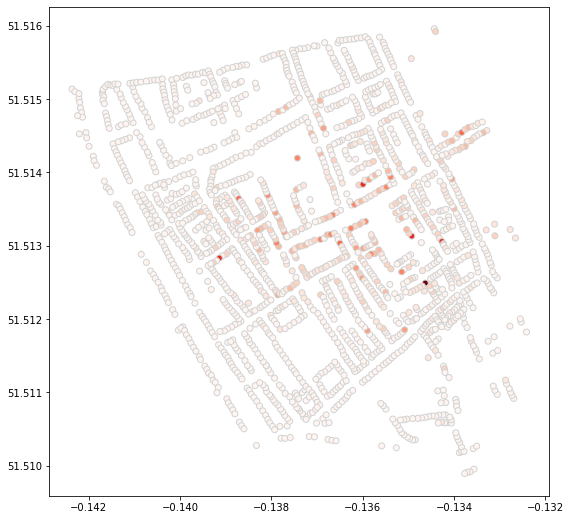

In [31]:
#quick plot
f, ax = plt.subplots(1, figsize=(9, 9))
houses.plot(ax=ax, column='deaths_r', cmap='Reds', edgecolor='lightgrey')

Note crs for houses is lat/lon which is different from crs for pumps etc.


Interpolate total deaths - (spatial?) sample from the full data set and use to predict on a grid (then compare to non-sampled points)

Use scipy.interpolate.griddata for simple interpolation  https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html

Example below (to build on, from section 7 notebook)

In [59]:
#sample from the full data set
hSample = houses.sample(frac=0.1, random_state=2)
print(hSample.shape)
hSample.head()

(185, 9)


,ID,deaths_r,deaths_nr,deaths,pestfield,dis_pestf,dis_sewers,dis_bspump,geometry
226,318.0,0.0,0.0,0.0,0.0,85.24,25.50,188.14,POINT (-0.13869 51.51221)
346,438.0,0.0,0.0,0.0,0.0,218.54,25.10,367.66,POINT (-0.14103 51.51522)
1037,1038.0,0.0,0.0,0.0,0.0,194.36,22.21,185.19,POINT (-0.13552 51.51184)
727,56.0,0.0,0.0,0.0,1.0,29.24,29.24,92.65,POINT (-0.13767 51.51279)
161,253.0,0.0,0.0,0.0,0.0,234.89,41.17,296.23,POINT (-0.13780 51.51077)


<AxesSubplot:>

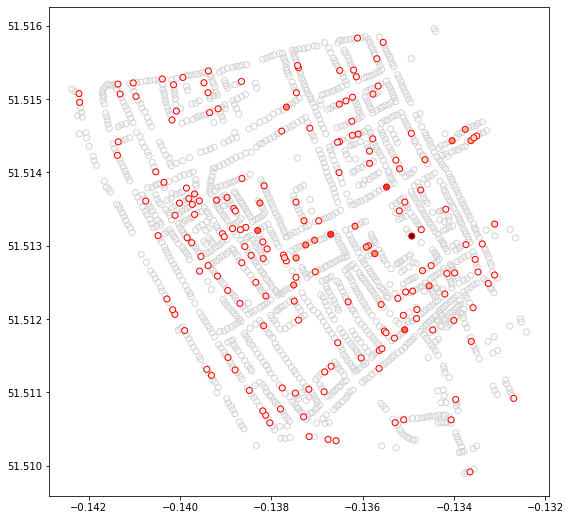

In [60]:
#quick plot of sample vs full data
f, ax = plt.subplots(1, figsize=(9, 9))
houses.plot(ax=ax, facecolor='none', edgecolor='lightgrey')
hSample.plot(ax=ax, column='deaths_r', cmap='Reds', edgecolor='red')

In [ ]:
#get x-coords, y-coords and attribute values
x=hSample['geometry'].x
y=hSample['geometry'].y
z=hSample['deaths_r']

In [ ]:
# define grid 
xi = np.linspace(-0.144,-0.132,120)
yi = np.linspace(51.508,51.518,100)

In [66]:
# do the interpolation https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
#grid the data, methods might be cubic, linear and nearest

zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear') 

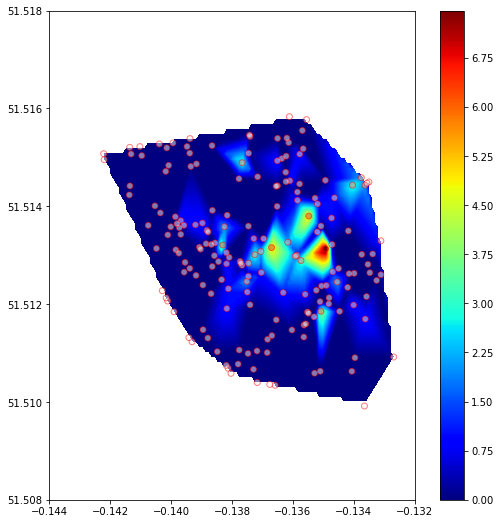

In [67]:
#plot
f, ax = plt.subplots(1, figsize=(9, 9))
plt.contourf(xi,yi,zi,255,cmap=plt.cm.jet)
hSample.plot(ax=ax, column='deaths_r', cmap='Reds', edgecolor='red', alpha=0.5)
plt.colorbar() # draw colorbar